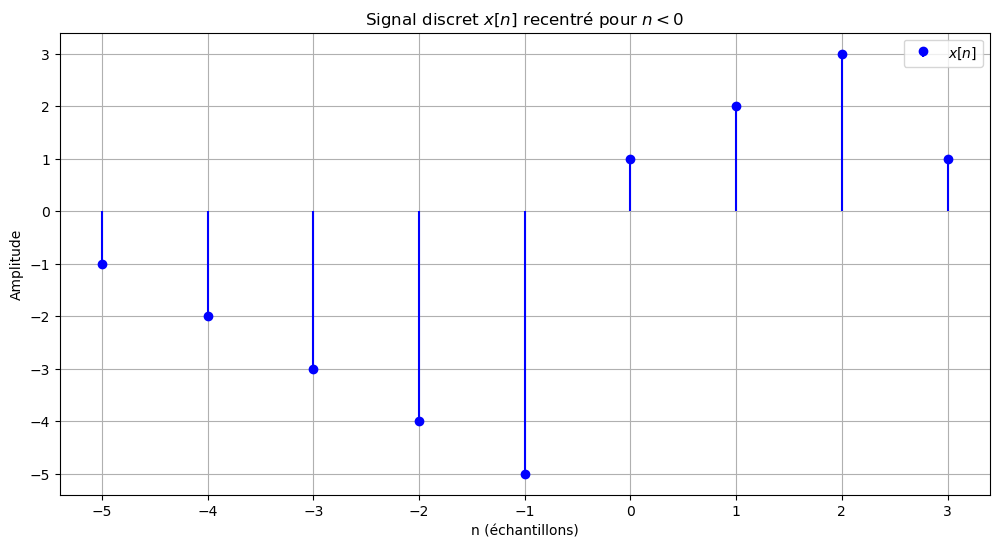

In [115]:
# Activer l'affichage dans le notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


N_positive = 4  
N_negative = 5   
n = np.arange(-N_negative, N_positive)  #Crée un tableau n


x_n = np.zeros(len(n))  #Crée un tableau x_n de la même longueur que n, initialisé à des zéros


x_n[:N_negative] = [-1, -2, -3, -4, -5]


x_n[N_negative + 0:] = [1, 2, 3, 1]


plt.figure(figsize=(12, 6))
plt.stem(n, x_n, basefmt=" ", linefmt="blue", markerfmt="bo", label='$x[n]$') #stem pour tracer un diagramme en tiges du signal 
#basefmt=" " retire la ligne de base horizontale au niveau de y=0




plt.title("Signal discret $x[n]$ recentré pour $n < 0$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

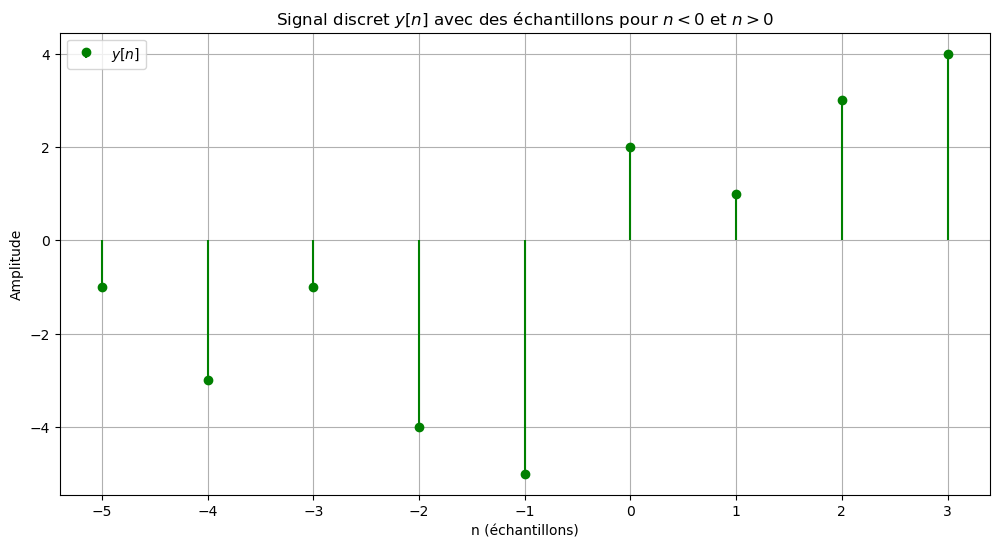

In [57]:

N_positive = 4  
N_negative = 5   
n = np.arange(-N_negative, N_positive)  


y_n = np.zeros(len(n)) 


y_n[:N_negative] = [-1, -3, -1, -4, -5]  


y_n[N_negative + 0:] = [2, 1, 3, 4]



# Tracer le signal y[n]
plt.figure(figsize=(12, 6))
plt.stem(n, y_n, basefmt=" ", linefmt="green", markerfmt="go", label='$y[n]$')
plt.title("Signal discret $y[n]$ avec des échantillons pour $n < 0$ et $n > 0$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


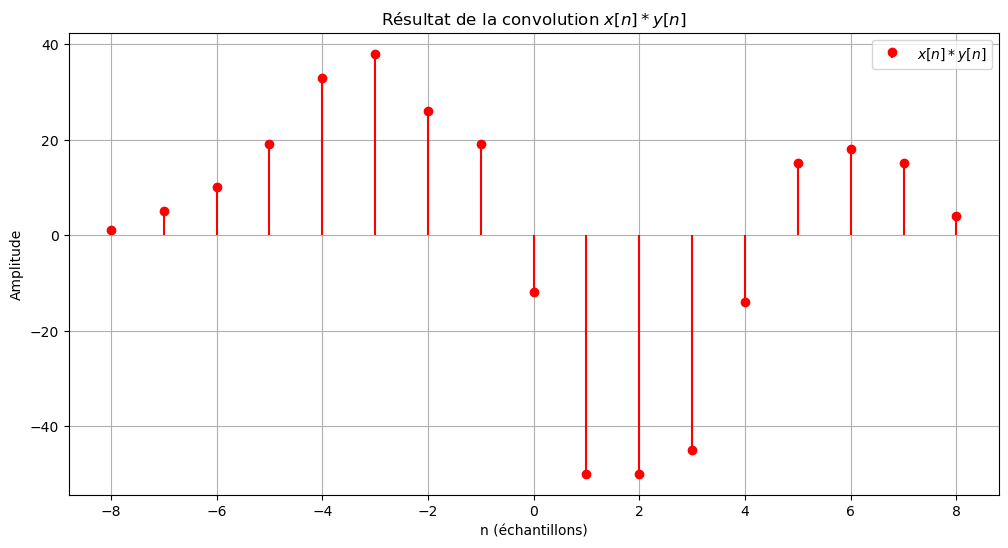

In [59]:
conv_result = np.convolve(x_n, y_n, mode='full')  # En mode 'full', le résultat de la convolution contient tous les termes possibles,
conv_indices = np.arange(-len(x_n) + 1, len(y_n))  


plt.figure(figsize=(12, 6))
plt.stem(conv_indices, conv_result, basefmt=" ", linefmt="red", markerfmt="ro", label='$x[n] * y[n]$')
plt.title("Résultat de la convolution $x[n] * y[n]$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


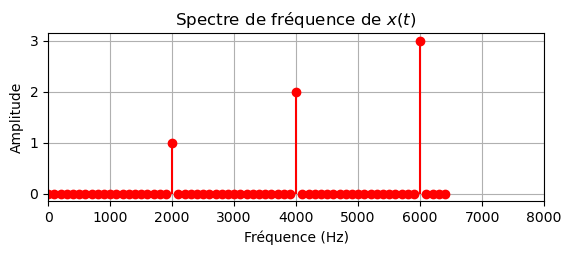

In [117]:
fs = 13000  
t = np.arange(0, 0.01, 1/fs) #Crée un tableau de temps 

x_t =  np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)


N = len(x_t) 
frequencies = np.fft.fftfreq(N, 1/fs)[:N//2] #Retourne un tableau des fréquences correspondant aux coefficients de la FFT.
X_f = np.fft.fft(x_t)[:N//2] #Calcule la transformée de Fourier discrète (


amplitudes = 2 * np.abs(X_f) / N  #Multiplie les amplitudes par 2 (pour compenser le fait que la FFT ne retourne que la moitié de l'énergie réelle) et les normalise par 



plt.subplot(2, 1, 2)
plt.stem(frequencies, amplitudes, basefmt=" ", linefmt="red", markerfmt="ro")
plt.title("Spectre de fréquence de $x(t)$")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid()


plt.xlim(0, 8000)
plt.show()

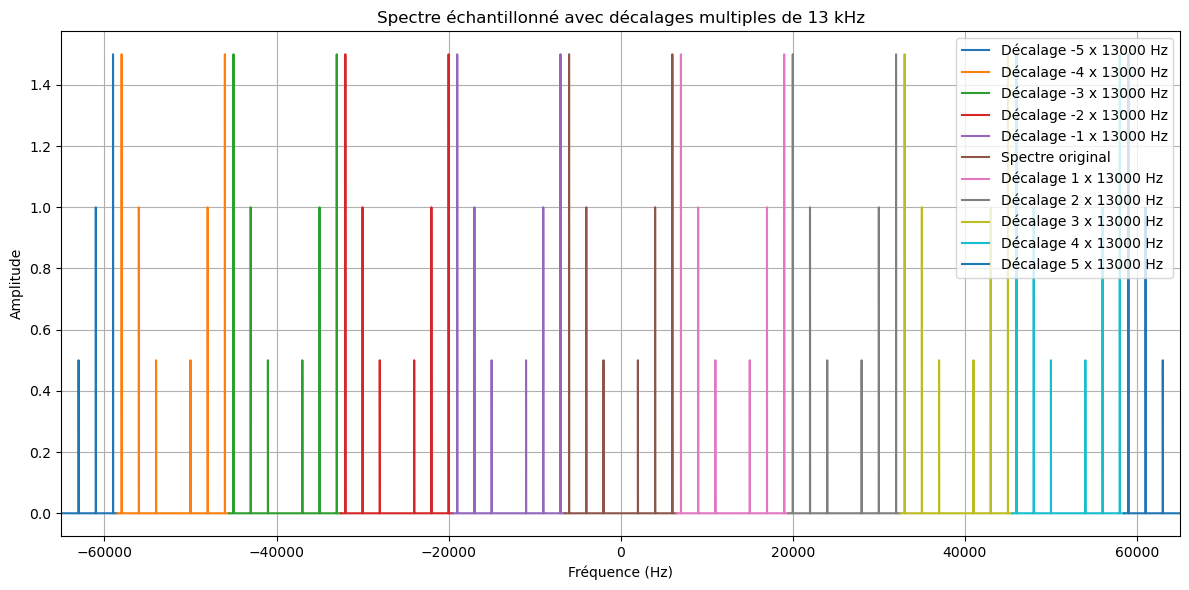

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# 1. Définition du signal x(t)
fs = 13000  # Fréquence d'échantillonnage initiale (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# 2. Calcul de la FFT du signal x(t)
fft_result = fft(x_t)  # Transformée de Fourier rapide du signal
frequencies = fftfreq(len(x_t), 1 / fs)  # Fréquences associées

# Décalage pour centrer autour de 0 Hz
amplitude_shifted = np.abs(fftshift(fft_result)) / len(x_t)  # Amplitude normalisée
frequencies_shifted = fftshift(frequencies)  # Décalage des fréquences

# 3. Décalage fréquentiel par des multiples de 13 kHz
multiples = range(-5, 6)  # Décalages de -5 à +5 fois fs (incluant 0)

plt.figure(figsize=(12, 6))

# Affichage du spectre pour chaque décalage
for multiple in multiples:
    shifted_frequencies = frequencies_shifted + (multiple * fs)
    label = f"Décalage {multiple} x 13000 Hz" if multiple != 0 else "Spectre original"
    plt.plot(shifted_frequencies, amplitude_shifted, label=label)

# 4. Visualisation
plt.title("Spectre échantillonné avec décalages multiples de 13 kHz")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-5 * fs, 5 * fs)  # Plage de fréquences pour visualiser les décalages multiples
plt.legend()
plt.tight_layout()
plt.show()

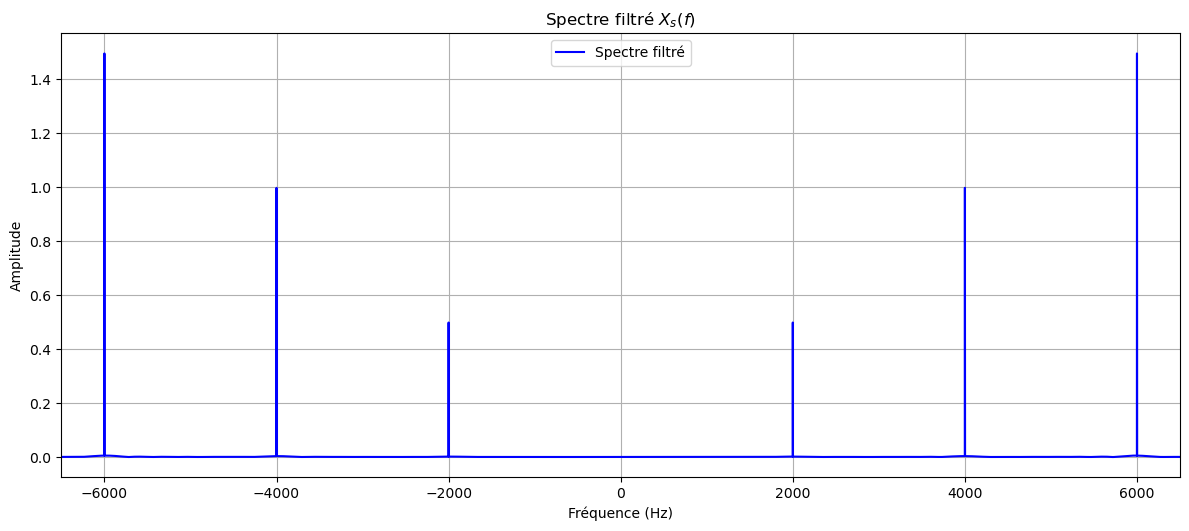

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import firwin, lfilter

# 1. Définition du signal x(t)
fs = 13000  # Fréquence d'échantillonnage (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# 2. Création du filtre passe-bas
cutoff_freq = 6400 # Fréquence de coupure (Hz) inférieure à fs/2
numtaps = 101  # Nombre de coefficients du filtre FIR
lowpass_filter = firwin(numtaps, cutoff_freq, fs=fs, pass_zero='lowpass')  # Créer le filtre passe-bas

# 3. Application du filtre passe-bas
x_t_filtered = lfilter(lowpass_filter, 1.0, x_t)  # Filtrage FIR

# 4. Calcul de la FFT du signal filtré
fft_result_filtered = fft(x_t_filtered)  # Transformée de Fourier rapide
frequencies_filtered = fftfreq(len(x_t_filtered), 1 / fs)  # Fréquences associées

# Normalisation des amplitudes
amplitude_filtered = np.abs(fft_result_filtered) / len(x_t_filtered)

# Diviser les amplitudes pour un spectre bilatéral (à l'exception de la composante DC)
amplitude_filtered[1:]/ 2  # Multiplier par 2 pour les fréquences non-DC

# Décalage du spectre pour visualisation
amplitude_shifted_filtered = fftshift(amplitude_filtered)  # Décalage du spectre
frequencies_shifted_filtered = fftshift(frequencies_filtered)  # Décalage des fréquences

# 5. Visualisation
plt.figure(figsize=(12, 10))

# Graphique 1: Spectre filtré (spectre bilatéral)
plt.subplot(2, 1, 1)
plt.plot(frequencies_shifted_filtered, amplitude_shifted_filtered, label="Spectre filtré", color="blue")
plt.title("Spectre filtré $X_s(f)$")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-fs / 2, fs / 2)  # Plage de fréquences jusqu'à la fréquence de Nyquist
plt.legend()

plt.tight_layout()
plt.show()